In [43]:
#load the necessary modules
import pandas as pd
import numpy as np
import datetime, math
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
from sklearn import svm, preprocessing
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

In [44]:
# loaded the csv file
df_train = pd.read_csv("../ten-datasets/pointcloudmnist2d/train.csv")
df_test = pd.read_csv("../ten-datasets/pointcloudmnist2d/test.csv")
df_train.head()

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,5,17,10,249,16,6,81,13,14,241,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,22,17,50,8,8,225,22,15,195,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,4,8,12,207,10,11,98,19,20,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,8,6,48,11,8,251,14,13,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,9,17,15,253,16,4,56,9,14,176,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [45]:
df_test.head()

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,7,14,7,254,21,18,140,21,17,106,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,17,6,253,16,19,253,10,7,253,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,16,18,223,10,4,5,15,13,165,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,17,8,253,20,17,105,14,20,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,4,18,17,18,10,11,85,17,4,236,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [46]:
# split the training data and target label
X_train = np.array(df_train.loc[:, 'x0':'v350'])
y_train = np.array(df_train['label'])
X_train.shape

(60000, 1053)

In [47]:
# split the test data and target label
X_test = np.array(df_test.loc[:, 'x0':'v350'])
y_test = np.array(df_test['label'])
X_test.shape

(10000, 1053)

In [60]:
y_train.shape
# y_train

(60000, 1)

In [50]:
# reshape the target label
y_train = y_train.reshape(-1, 1)
y_train.shape
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]])

In [7]:
y_test = y_test.reshape(-1, 1)
y_test.shape

(10000, 1)

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


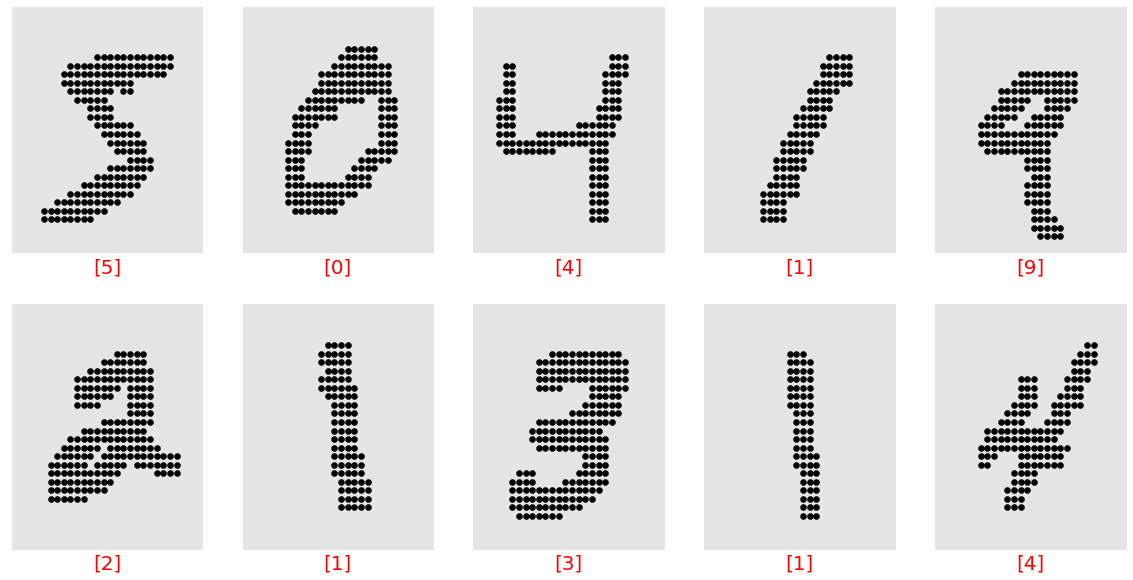

In [8]:
#visualize the first 10 training images 
i, x, y = 0, 0, 0

plt.figure(figsize=(20,10))
for num_fig in range(10):
    plt.subplot(2, 5, num_fig+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-1, 28)
    plt.ylim(-1, 28)
    plt.xlabel(y_train[num_fig], size=20, color='red')
    i = 0
    for val in X_train[num_fig]:
        if val != -1:
            if i % 3 == 0:
                x = val
            if i % 3 == 1:
                y = val
            if i % 3 == 2:
                plt.scatter(x, y, color='black')
                #print(i)
        #print(val)
       
        i += 1



In [9]:
# function to restructure the image dataset as 28 x 28 format
def restore_image_array(X_array, resolution):
    num_samples = len(X_array)
    #print(num_samples)
    X_img = np.zeros((num_samples, resolution, resolution))
    
    x, y, pixel = 0, 0, 0
    
    for seq in range(num_samples):
        i = 0
        for val in X_array[seq]:
            if val != -1:
                if i % 3 == 0:
                    x = val
                if i % 3 == 1:
                    y = val
                if i % 3 == 2:
                    pixel = val
                    X_img[seq][27-y][x] = pixel
                 
            i += 1
    
    return X_img
    

In [10]:
# restructure as 28 x 28 image format
X_img_train = restore_image_array(X_train, 28)
X_img_train.shape

(60000, 28, 28)

In [11]:
# same for the test data
X_img_test = restore_image_array(X_test, 28)
X_img_test.shape

(10000, 28, 28)

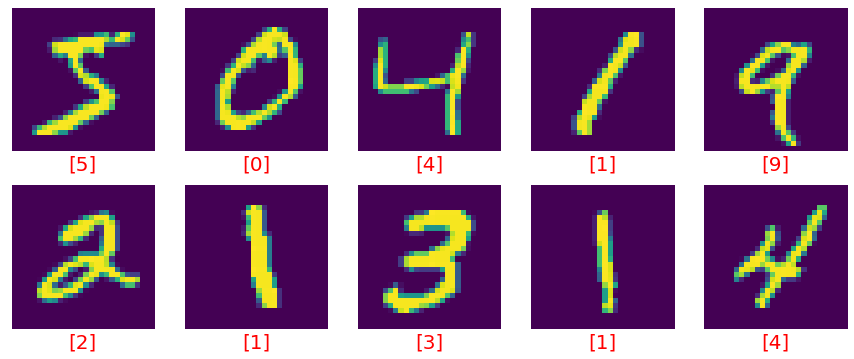

In [12]:
#visualize the first 10 image after restore as image format
plt.figure(figsize=(15,6))
for num_fig in range(10):
    plt.subplot(2, 5, num_fig+1)
    plt.imshow(X_img_train[num_fig])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(y_train[num_fig], size=20, color='red')


# Shallow Learning
## Preprocessing

In [13]:
X_img_train.shape

(60000, 28, 28)

In [14]:
# reduce the dim of the training data and test data
X_flatten_train = X_img_train.reshape(len(X_img_train), -1)
X_flatten_test = X_img_test.reshape(len(X_img_test), -1)
print(X_flatten_train.shape)
print(X_flatten_test.shape)

(60000, 784)
(10000, 784)


In [15]:
# scale the dataset to range 0.0 - 1.0

X_flatten_train = X_flatten_train / 255.0
X_flatten_test = X_flatten_test / 255.0

In [16]:
# function to display the cunfustion matrix for the shallow learning model
def model_fit_report(y_values_actual, y_values_predicted, labels):
       
        
    matrix = confusion_matrix(y_values_actual, y_values_predicted, labels)
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(matrix, annot=True, fmt='d', linewidths=.5, center=0)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(len(labels))+0.5, labels)
    plt.ylabel('True label')
    plt.yticks(np.arange(len(labels))+0.5, labels)
    plt.show()

    print("Classification Report")
    print("")
    print (classification_report(y_values_actual, y_values_predicted))

# Extra trees

In [17]:
%%time

clf = ExtraTreesClassifier(n_estimators=100, max_features='sqrt', random_state=0)
clf.fit(X_flatten_train, y_train)

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CPU times: user 48.9 s, sys: 648 ms, total: 49.6 s
Wall time: 50.2 s


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [18]:
# training accuracy
accuracy = clf.score(X_flatten_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 1.0000


In [19]:
# test accuracy
accuracy = clf.score(X_flatten_test, y_test)
print('model test accuracy: %.4f' %(accuracy))

model test accuracy: 0.9706


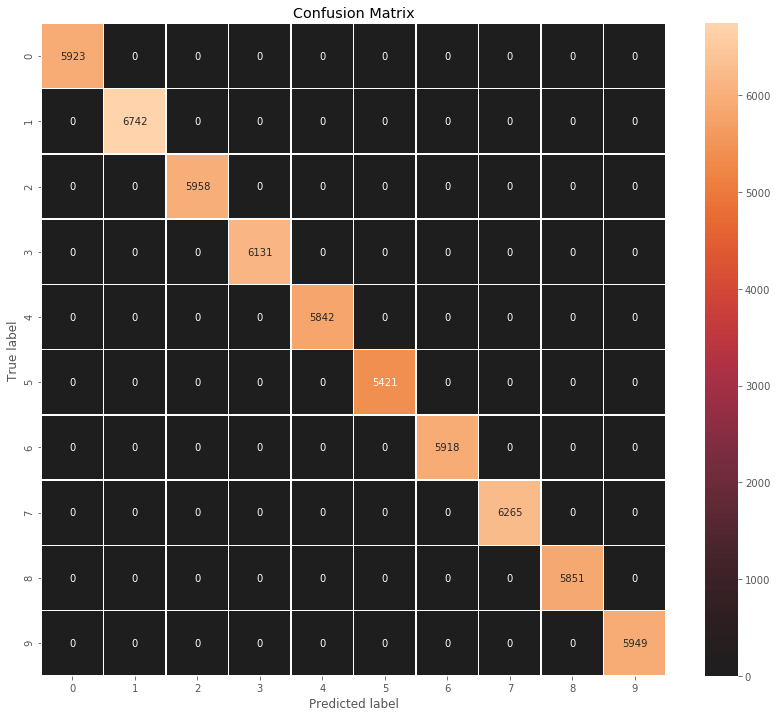

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



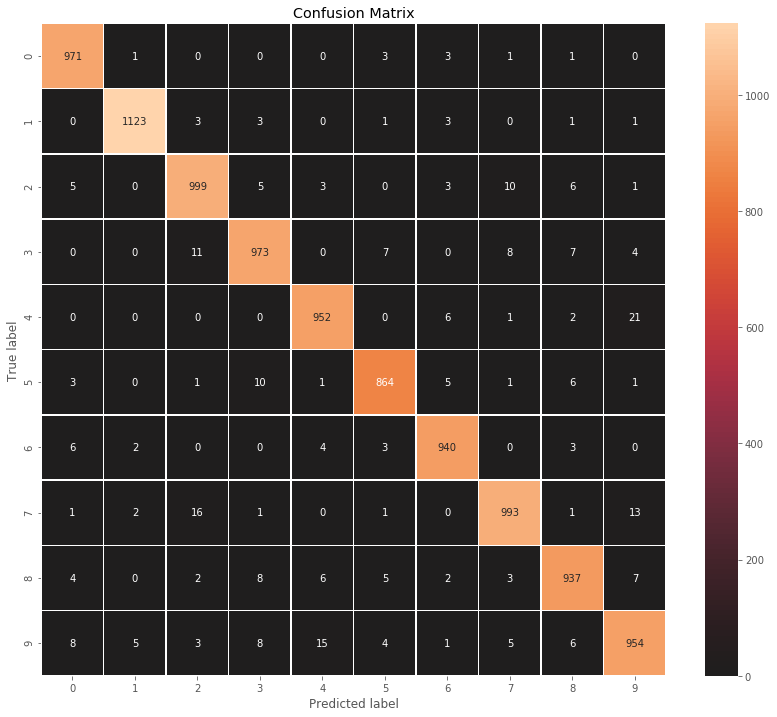

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [20]:
y_train_predict = clf.predict(X_flatten_train)
model_fit_report(y_train, y_train_predict, np.unique(y_train))

#get results for test dataset
y_test_predict = clf.predict(X_flatten_test)
model_fit_report(y_test, y_test_predict, np.unique(y_test))

# Deep Learning

In [51]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense, LSTM
from keras.utils.vis_utils import plot_model

In [52]:
num_classes = 10

In [53]:
X_flatten_train.shape[1:]

(784,)

In [54]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat.shape

(60000, 10)

In [55]:
# function to plot the epo history
def plot_history(history):
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# CNN

In [56]:
y_train.shape

(60000, 1)

In [57]:
# Scale value to range 0 to 1 
X_img_train = X_img_train / 255.0
X_img_test = X_img_test / 255.0

In [58]:
X_img_train = X_img_train[:, :, :, np.newaxis]
X_img_train.shape

(60000, 28, 28, 1, 1)

In [59]:
X_img_test = X_img_test[:, :, :, np.newaxis]
X_img_test.shape

(10000, 28, 28, 1, 1)

In [29]:
# use 3 x 3 filters in CNN and maxpooling with 2 x 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_img_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [31]:
history = model.fit(X_img_train, y_train, batch_size=128, epochs=3, validation_data=(X_img_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 182s 3ms/step - loss: 0.2198 - accuracy: 0.9293 - val_loss: 0.0435 - val_accuracy: 0.9862
Epoch 2/3
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 3/3
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0265 - val_accuracy: 0.9910


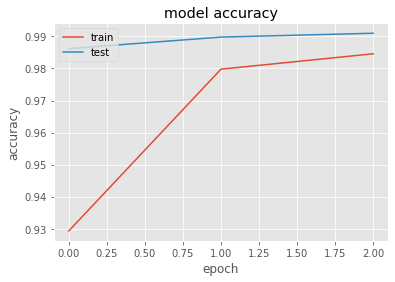

In [32]:
plot_history(history)

# Combine CNN and shallow learning

In [36]:
print(X_img_train.shape)
print(X_img_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [37]:
y_train.shape

(60000, 1)

In [38]:
# use 3 x 3 filters in CNN and maxpooling with 2 x 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_img_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)         

In [39]:
# model.compile(optimizer='adam', 
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(X_img_train, y_train, batch_size=128, epochs=3, validation_data=(X_img_test, y_test))

In [40]:

intermediate_layer_model = Model(inputs = model.input, outputs = model.layers[9].output)
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        3692

In [41]:
X_mid_layer_train = intermediate_layer_model.predict(X_img_train)
X_mid_layer_test = intermediate_layer_model.predict(X_img_test)
print(X_mid_layer_train.shape)
print(X_mid_layer_test.shape)


(60000, 512)
(10000, 512)


### use Logistic Regression to combine with CNN intermediate_layer_model

In [42]:
y_train.shape

(60000, 1)

In [43]:
%%time

clf = LogisticRegression(solver='saga')
clf.fit(X_mid_layer_train, y_train)

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 51.7 s, sys: 470 ms, total: 52.2 s
Wall time: 52.4 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# training accuracy
accuracy = clf.score(X_mid_layer_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 0.9276


In [45]:
accuracy = clf.score(X_mid_layer_test, y_test)
print('model test accuracy: %.4f' %(accuracy))

model test accuracy: 0.9304


### use Random Forest to combine with CNN intermediate_layer_model

## use the deep features

In [112]:
deep_feature_model = Model(inputs= model.input, outputs = model.layers[6].output)
deep_feature_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        3692

In [113]:
X_deep_feature_train = deep_feature_model.predict(X_img_train)
X_deep_feature_test = deep_feature_model.predict(X_img_test)
X_deep_feature_train.shape

(60000, 5, 5, 64)

In [114]:
X_flat_deep_train = X_deep_feature_train.reshape(len(X_deep_feature_train), -1)
X_flat_deep_test = X_deep_feature_test.reshape(len(X_deep_feature_test), -1)
X_flat_deep_train.shape

(60000, 1600)

In [115]:
%%time

clf = LogisticRegression(solver='saga')
clf.fit(X_flat_deep_train, y_train)

Wall time: 10min 1s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
# training accuracy
accuracy = clf.score(X_flat_deep_train, y_train)
print('model training accuracy: %.4f' %(accuracy))

model training accuracy: 0.9996


In [117]:
accuracy = clf.score(X_flat_deep_test, y_test)
print('model test accuracy: %.4f' %(accuracy))

model test accuracy: 0.9940


## Combine Logistic Regression and MLP

In [118]:
%%time

clf = LogisticRegression(solver='saga')
clf.fit(X_flatten_train, y_train)

Wall time: 4min 56s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
y_train_predict = clf.predict(X_flatten_train)
y_test_predit = clf.predict(X_flatten_test)


In [123]:
def extend_dim(X,y_predict):
    X_list = X.tolist()
    for i in range(len(X_list)):
        X_list[i].append(y_train_predict[i])
    return np.array(X_list)

In [125]:
X_new_flattern_train = extend_dim(X_flatten_train, y_train_predict)
X_new_flattern_train.shape

(60000, 785)

In [126]:
X_new_flattern_test = extend_dim(X_flatten_test, y_test_predit)
X_new_flattern_test.shape

(10000, 785)

In [128]:
# 2 hidden layers, 512 units
inputs = Input(shape=X_new_flattern_train.shape[1:])
hidden = Dense(512, activation='relu')(inputs)
Dropout(0.25)
hidden = Dense(512, activation='relu')(hidden)
Dropout(0.25)
preds = Dense(num_classes,activation='softmax')(hidden)

model = Model(inputs=inputs,outputs=preds)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_new_flattern_train, y_train, batch_size=128, epochs=10, validation_data=(X_new_flattern_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2201 - accuracy: 0.9383 - val_loss: 0.1330 - val_accuracy: 0.9583
Epoch 2/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.1226 - val_accuracy: 0.9616
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0522 - accuracy: 0.9832 - val_loss: 0.0812 - val_accuracy: 0.9743
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0786 - val_accuracy: 0.9740
Epoch 5/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0897 - val_accuracy: 0.9729
Epoch 6/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0679 - val_accuracy: 0.9788
Epoch 7/10
60000/60000 [==============================] - 9s 1

In [ ]:
plot_history(history)